# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/Documents/MIDS/W207/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


data shape:  (70000, 784)
label shape: (70000,)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

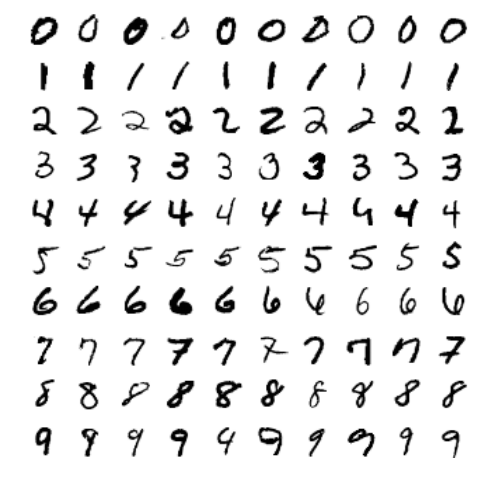

In [4]:
def P1(num_examples=10):

### STUDENT START ###

    # setting figure to a bigger size than default to see plots clearer
    f, axs = plt.subplots(10,num_examples,figsize=(8,8))
    
    for row in range(0,10):
        for col in range(1,num_examples+1):
            # subplot indexing by row & column
            plt.subplot(10,num_examples,num_examples*row+col)
            plt.imshow(dev_data[dev_labels==row][col].reshape(28,28), cmap="Greys")
            plt.axis('off')

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
def P2(k_values):

### STUDENT START ###
    for i in k_values:
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(train_data, train_labels)
        preds = neigh.predict(dev_data)
        print "k=",i,":",classification_report(dev_labels, preds) 
        
    print """For k=1, the most difficult digit can be said to be 8, with the lowest F1 score at .95
    Looking more carefully at the precision and recall scores, we see that although the k=1 model captured 8's
    with less error compared to other digits (precision), it also missed a lot of 8's when the true digit was an 8
    (recall lowest at .93). In precision, 8 did better than 0,3,5,9 while on recall it performed much worse."""

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k= 1 :              precision    recall  f1-score   support

        0.0       0.96      1.00      0.98        99
        1.0       1.00      1.00      1.00       105
        2.0       0.98      0.96      0.97       102
        3.0       0.95      0.97      0.96        86
        4.0       0.99      0.98      0.99       104
        5.0       0.97      0.97      0.97        91
        6.0       0.99      0.98      0.98        98
        7.0       0.99      0.98      0.99       113
        8.0       0.98      0.93      0.95        96
        9.0       0.95      1.00      0.98       106

avg / total       0.98      0.98      0.98      1000

k= 3 :              precision    recall  f1-score   support

        0.0       0.98      0.99      0.98        99
        1.0       0.98      1.00      0.99       105
        2.0       0.99      0.92      0.95       102
        3.0       0.92      0.98      0.95        86
        4.0       0.99      1.00      1.00       104
        5.0       0.98      

ANSWER: For k=1, the most difficult digit can be said to be 8, with the lowest F1 score at .95. Looking more carefully at the precision and recall scores, we see that although the k=1 model captured 8's with less error compared to other digits (precision), it also missed a lot of 8's when the true digit was an 8 (recall lowest at .93). In precision, 8 did better than 0,3,5,9 while on recall it performed much worse.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [6]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    np.random.seed(0)
    
    # initialize time_taken list to append runtime to
    time_taken = []

    # start for loop to go through each training size
    for train_size in train_sizes:
        knn = KNeighborsClassifier(n_neighbors=1)
        # random sample of training size from train_data
        rand = np.random.choice(len(train_data),train_size,replace=False)
        knn.fit(train_data[rand], train_labels[rand])
        # set start time variable to calculate total prediction time
        start = time.time()
        preds2 = knn.predict(dev_data)
        total = time.time()-start
        # append to empty lists for each training size
        time_taken.append(total)
        accuracies.append(knn.score(dev_data, dev_labels))
    
    # print prediction time and accuracy scores in order of train_sizes
    # rounded during print for simpler viewing, but not rounded in the actual list, for computation
    print ('Time to predict (sec): %s' % [round(j,5) for j in time_taken])
    print ('Accuracies (percent): %s' % [round(i,5) for i in accuracies])


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Time to predict (sec): [0.11977, 0.21786, 0.48888, 1.0004, 1.92026, 3.8706, 7.67391, 15.54008, 30.49979]
Accuracies (percent): [0.745, 0.748, 0.828, 0.87, 0.895, 0.921, 0.951, 0.943, 0.972]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Predicted Accuracy for n=60000:  1.255
Predicted Accuracy for n=log(60000):  1.031


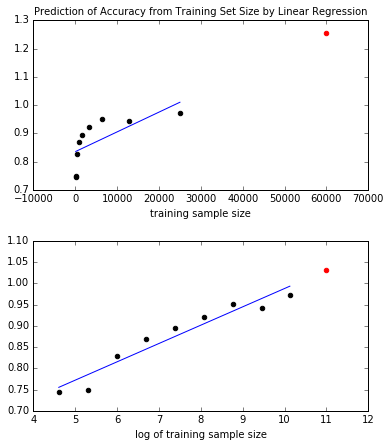

In [7]:
def P4():

### STUDENT START ###

    # set input and output as matrices with col=1
    train_sizes_mat = np.matrix(train_sizes).reshape(-1,1)
    accuracies_mat = np.matrix(accuracies).reshape(-1,1)
    
    fig = plt.figure(figsize=(6,7))
    fig.subplots_adjust(hspace=.3)
    
    ax1 = fig.add_subplot(211)
    mod = LinearRegression()
    mod.fit(train_sizes_mat, accuracies_mat)
    ax1.scatter(train_sizes_mat, accuracies_mat, color='black')
    ax1.plot(train_sizes_mat, mod.predict(train_sizes_mat), color='blue')
    ax1.scatter(np.matrix(60000), mod.predict(np.matrix(60000)), color='red')
    ax1.set_xlabel('training sample size')
    ax1.set_title('Prediction of Accuracy from Training Set Size by Linear Regression', fontsize=10)
    print 'Predicted Accuracy for n=60000: ', round(mod.predict(np.matrix(60000))[0,0],3)

    # The regression model predicts an accuracy of 1.255 (125.5%) which is impossible.
    # this demonstrates the issue with using regression here: there is an upper ceiling
    # of what accuracy can be - it cannot be higher than 1. Linear regression is exactly
    # that - linear - so following the training data, the model predicted a higher training
    # size of 60,000 would result in a greater accuracy.
    
    # apply transformations to try to get more reasonable results
    ax2 = fig.add_subplot(212)
    mod2 = LinearRegression()
    mod2.fit(np.log(train_sizes_mat), accuracies_mat)
    ax2.scatter(np.log(train_sizes_mat), accuracies_mat, color='black')
    ax2.plot(np.log(train_sizes_mat), mod2.predict(np.log(train_sizes_mat)), color='blue')
    ax2.scatter(np.matrix(np.log(60000)), mod2.predict(np.matrix(np.log(60000))), color='red')
    ax2.set_xlabel('log of training sample size')
    print 'Predicted Accuracy for n=log(60000): ', round(mod2.predict(np.matrix(np.log(60000)))[0,0],3)
    
    # The log transformation made the predictions slightly more reasonable. As shown in
    # the second plot, the prediction line in blue is much closer to the true points
    # in black due to the log transformation of the x values. Indeed, the prediction for
    # a training size of 60000 (with the log transform) is now an accuracy of 1.031, which
    # is still completely unreasonable as an accuracy percentage but, in a theoretical sense,
    # more reasonable than 1.255. At least, any other prediction that is under 100% would be
    # much closer to the true values than the model created without the log transformation.

### STUDENT END ###

P4()

ANSWER:    The regression model predicts an accuracy of 1.255 (125.5%) which is impossible. This demonstrates the issue with using regression here: there is an upper ceiling of what accuracy can be - it cannot be higher than 1. Linear regression is exactly that - linear - so following the training data, the model predicted a higher training size of 60,000 would result in a greater accuracy.

The log transformation made the predictions slightly more reasonable. As shown inthe second plot, the prediction line in blue is much closer to the true points in black due to the log transformation of the x values. Indeed, the prediction for a training size of 60000 (with the log transform) is now an accuracy of 1.031, which is still completely unreasonable as an accuracy percentage but, in a theoretical sense, more reasonable than 1.255. At least, any other prediction that is under 100% would be much closer to the true values than the model created without the log transformation.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]] 

true values:  [6, 7, 8, 3, 8, 8, 3, 5, 8, 4, 4, 2, 5, 5, 8, 3, 2, 8, 8, 2, 2, 7, 6]
predictions:  [4, 2, 3, 8, 6, 5, 5, 0, 3, 9, 9, 7, 8, 9, 5, 9, 0, 0, 2, 3, 3, 9, 0] 

[ 6.  7.  8.  3.  8.  8.  3.  5.  8.  4.  4.  2.  5.  5.  8.  3.  2.  8.
  8.  2.  2.  7.  6.]
The most confused pair of digits is 5 and 8, and 3 and 8, with 3 cases of mixups for each pair


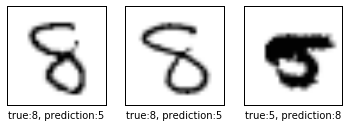

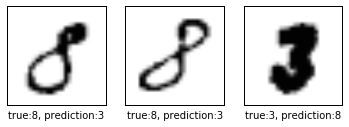

In [8]:
#def P5():

### STUDENT START ###

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_data,train_labels)
preds = knn.predict(dev_data)
print confusion_matrix(dev_labels, preds), "\n"

print "true values: ", [int(i) for i in dev_labels[dev_labels!=preds]]
print "predictions: ", [int(i) for i in preds[dev_labels!=preds]], "\n"

print dev_labels[np.where(dev_labels!=preds)]

print "The most confused pair of digits is 5 and 8, and 3 and 8, with 3 cases of mixups for each pair"

# Plots to show confusion between 5 and 8
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.imshow(dev_data[np.where((dev_labels==8) & (preds==5))][0].reshape(28,28), cmap="Greys")
ax1.set_xticks([]); ax1.set_yticks([]); ax1.set_xlabel('true:8, prediction:5')

ax2 = fig.add_subplot(132)
ax2.imshow(dev_data[np.where((dev_labels==8) & (preds==5))][1].reshape(28,28), cmap="Greys")
ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_xlabel('true:8, prediction:5')

ax3 = fig.add_subplot(133)
ax3.imshow(dev_data[np.where((dev_labels==5) & (preds==8))][0].reshape(28,28), cmap="Greys")
ax3.set_xticks([]); ax3.set_yticks([]); ax3.set_xlabel('true:5, prediction:8')

# Plots to show confusion between 3 and 8
fig2 = plt.figure()

ax4 = fig2.add_subplot(131)
ax4.imshow(dev_data[np.where((dev_labels==8) & (preds==3))][0].reshape(28,28), cmap="Greys")
ax4.set_xticks([]); ax4.set_yticks([]); ax4.set_xlabel('true:8, prediction:3')

ax5 = fig2.add_subplot(132)
ax5.imshow(dev_data[np.where((dev_labels==8) & (preds==3))][1].reshape(28,28), cmap="Greys")
ax5.set_xticks([]); ax5.set_yticks([]); ax5.set_xlabel('true:8, prediction:3')

ax6 = fig2.add_subplot(133)
ax6.imshow(dev_data[np.where((dev_labels==3) & (preds==8))][0].reshape(28,28), cmap="Greys")
ax6.set_xticks([]); ax6.set_yticks([]); ax6.set_xlabel('true:3, prediction:8')

### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

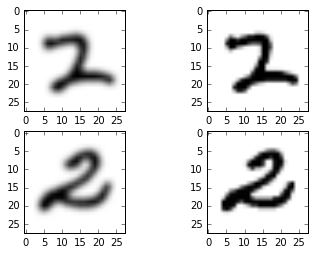

In [10]:
def P6(dataset):
    
### STUDENT START ###
### PART 1 OF P6.. PART 2 with KNN is in cell below ###

    # initialize new array for gaussian blurred values
    gauss_data = np.tile(np.zeros(784),(len(dataset),1))

    # with sigma=1.5, these are the weights per 3x3 coordinate for a 2-D Gaussian distribution
    gauss_wts = np.array([.0947416, .118318, .0947416, .118318, .147761, .118318, .0947416, .118318, .0947416]).reshape(3,3)

    # for each image/array in the dataset...
    for x in range(0,len(dataset)):
        # initalize a new array with blurred values
        gauss_mat = np.zeros(784).reshape(28,28)
        # for every pixel, create temporary 3x3 arrays in order to calculate the gaussian blur & new value
        for i in range(1,27):
            for j in range(1,27):
                temp_mat = dataset[x].reshape(28,28)[i-1, range(j-1,j+2)].reshape(1,3)
                temp_mat = np.vstack((temp_mat,dataset[x].reshape(28,28)[i, range(j-1,j+2)].reshape(1,3)))
                temp_mat = np.vstack((temp_mat,dataset[x].reshape(28,28)[i+1, range(j-1,j+2)].reshape(1,3)))
                gauss_mat[i,j] = np.sum((temp_mat * gauss_wts).reshape(1,9))
        # new blurred values stored in the gauss_data multidimensional arrayy
        # basically another copy of the original dataset, but with new, gaussian values
        gauss_data[x] = gauss_mat.reshape(1,784)
    
    fig3 = plt.figure()
    ax1 = fig3.add_subplot(221)
    ax1.imshow(gauss_data[2].reshape(28,28), cmap="Greys")
    ax2 = fig3.add_subplot(222)
    ax2.imshow(dataset[2].reshape(28,28), cmap="Greys")

    ax1 = fig3.add_subplot(223)
    ax1.imshow(gauss_data[3].reshape(28,28), cmap="Greys")
    ax2 = fig3.add_subplot(224)
    ax2.imshow(dataset[3].reshape(28,28), cmap="Greys")
    
    return gauss_data


### STUDENT END ###
### PART 2 OF THIS PROBLEM IS IN THE CELL BELOW ###
### P6 formula used for blurring only, cell below has the predictions/knn scoring ###

P6(dataset=train_data)

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  81   0   1   0   1   1   2]
 [  0   0   0   0 103   0   0   0   0   1]
 [  1   0   0   0   0  89   0   0   0   1]
 [  0   1   0   0   1   0  96   0   0   0]
 [  0   0   0   0   0   0   0 113   0   0]
 [  0   0   1   2   0   0   0   0  92   1]
 [  0   0   0   0   0   1   0   0   0 105]] accuracy:  0.981 

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  94   2   0   0   0   4   1   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 104   0   0   0   0   0]
 [  1   0   0   1   0  85   0   0   1   3]
 [  1   1   0   0   1   0  95   0   0   0]
 [  0   3   0   0   0   0   0 110   0   0]
 [  1   0   1   3   0   2   1   0  87   1]
 [  0   0   0   0   3   1   0   1   0 101]] accuracy:  0.963 

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98 

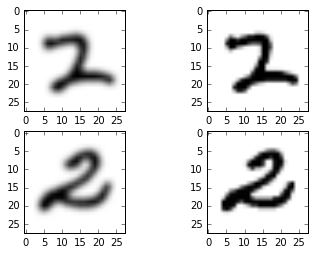

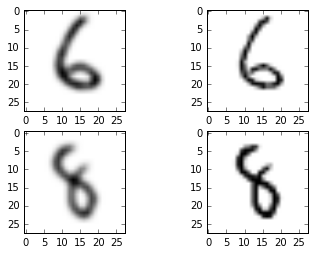

In [11]:
# PART 2 of P6
# using the blur function from above to test on knn algorithm

train_blur = P6(train_data)
dev_blur = P6(dev_data)

# Preprocess the training data but not the dev data
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(train_blur,train_labels)
preds = knn1.predict(dev_data)
print confusion_matrix(dev_labels, preds), "accuracy: ",knn1.score(dev_data,dev_labels),"\n"

#preprocess the dev data but not the training data
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(train_data,train_labels)
preds = knn2.predict(dev_blur)
print confusion_matrix(dev_labels, preds), "accuracy: ",knn2.score(dev_blur,dev_labels),"\n"

#preprocess both training and dev data
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(train_blur,train_labels)
preds = knn3.predict(dev_blur)
print confusion_matrix(dev_labels, preds), "accuracy: ",knn3.score(dev_blur,dev_labels),"\n"


ANSWER: Best accuracy came out for preprocessing the training data but not the dev data, which makes sense because we want to get the most generalizable training data. We don't want to overfit with the training and make it difficult to classify the dev data when we predict. Blurring the training gives us more "smooth" data, so that our training is less specific to exact pixels and more averages (smoothing) of the pixels.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [13]:
def P7():

### STUDENT START ###
    bnb = BernoulliNB(binarize=0.2)
    bnb.fit(train_data,train_labels)
    bnb_pred = bnb.predict(dev_data)
    bnb_score = bnb.score(dev_data, dev_labels)
    print "bernoulli accuracy: ", bnb_score

    # mapping pixel values to 0,1,2. dividing in 3 groups at thresholds: 1/3 & 2/3
    mnb_train_data = np.where(train_data<=.33333, 0, np.where(train_data<=.66666,1,2))
    mnb = MultinomialNB()
    mnb.fit(mnb_train_data,train_labels)
    mnb_pred = mnb.predict(dev_data)
    mnb_score = mnb.score(dev_data, dev_labels)

    print "multinomial accuracy: ", mnb_score 

### STUDENT END ###

P7()

bernoulli accuracy:  0.834
multinomial accuracy:  0.827


ANSWER: The multinomial NB does not improve the results, in fact they make it worse. It makes sense that the multinomial does not improve average accuracy because labeling in between values as grey puts a lot of unnecessary and unhelpful differentiation between digits. We're really only caring about where the pixels are colored in vs where they are not, since that's what writing digits looks like. You either put the pen down to write the digit or you leave that area empty. Grey values do not actually translate to some measure of the ink to write the digit, so they introduce a third dimension that obscures the identification. It's more helpful to categorize pixels as "pen was here (black)" or "pen was not here (white)" instead of "pen was kindof here (gray)" which does not really help distinguish the drawing path of the digit.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [1]:
def P8(alphas):
    
    ### STUDENT START ###
    
    bern = BernoulliNB(binarize=0.2)
    nb = GridSearchCV(bern, alphas)
    nb.fit(train_data, train_labels)
    return nb
    ### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

NameError: global name 'BernoulliNB' is not defined

In [15]:
# best parameter and score when searching through list of alphas given above
print nb.best_params_
print nb.best_score_

# answering question, what is the accuracy when alpha=0?
print P8({'alpha':[0.0]}).best_params_
print P8({'alpha':[0.0]}).best_score_

{'alpha': 0.0001}
0.8365
{'alpha': 0.0}
0.0989166666667


ANSWER: The best parameter for alpha is 0.0001, with the highest mean accuracy score of 83.65%. When alpha=0, the accuracy is 9.89%, which is pretty unfortunate. We do expect this because alpha=0 means there is no smoothing being done whatsoever. This means every pixel is taken as is and made either black or white, with no averaging of neighboring pixels, so it is extremely precise and yet near impossible to generalize. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [18]:
def P9():
    
    np.random.seed(0)
    
    ### STUDENT END ###
    gauss = GaussianNB()
    gauss.fit(train_data, train_labels)
    print "Gaussian accuracy: ", gauss.score(dev_data, dev_labels)
    # accuracy of 57% is much worse than Bernoulli..
    
    gauss.theta_, gauss.sigma_
    
    gauss_fix = GaussianNB()
    # initialize matrix that's going to contain the new values with some normal noise
    addnoise = np.tile(np.zeros(784),(len(train_data),1))
    # go through every sample digit and add noise from a normal distribution
    for i in range(0,len(train_data)):
        addnoise[i] = train_data[i] + np.random.normal(.1,.1,784)
        # trying .1 and .1 because intuitively .1 makes sense as an average value between
        # 0 and 1 to be the average value of the pixels
        # and tried random values between .1 -> .3 as the variance
    gauss_fix.fit(addnoise, train_labels)
    print "Gaussian with normal adjustment accuracy: ", gauss_fix.score(dev_data, dev_labels)
    # gives an accuracy of .829 which is much better than .571 because we added normal noise
    # so the GaussianNB is actually getting some normal distribution from the data
    # but can we do better?!
    
    # going through some values close to the ones we chose to look through our options...
    gauss_fix2 = GaussianNB()
    for theta in [.15,.16,.17]:
        for sigma in [.07,.08,.09,.10]:
            addnoise = np.tile(np.zeros(784),(len(train_data),1))
            for i in range(0,len(train_data)):
                addnoise[i] = train_data[i] + np.random.normal(theta,sigma,784)
            gauss_fix2.fit(addnoise,train_labels)
            print "theta: ", theta, "sigma: ", sigma, "score", gauss_fix2.score(dev_data, dev_labels)
    # looks like setting a mean of .16 and a variance of .09 gives an accuracy of .839
    # which is even better than the bernoulli by itself.. but looking at other values,
    # any mean and variance close to .16 and .1 respectively seems to get a good accuracy closer to .82

    ### STUDENT END ###

gnb = P9()

Gaussian accuracy:  0.571
Gaussian with normal adjustment accuracy:  0.829
theta:  0.15 sigma:  0.07 score 0.795
theta:  0.15 sigma:  0.08 score 0.834
theta:  0.15 sigma:  0.09 score 0.841
theta:  0.15 sigma:  0.1 score 0.833
theta:  0.16 sigma:  0.07 score 0.712
theta:  0.16 sigma:  0.08 score 0.818
theta:  0.16 sigma:  0.09 score 0.839
theta:  0.16 sigma:  0.1 score 0.838
theta:  0.17 sigma:  0.07 score 0.645
theta:  0.17 sigma:  0.08 score 0.78
theta:  0.17 sigma:  0.09 score 0.83
theta:  0.17 sigma:  0.1 score 0.838


ANSWER: GaussianNB assumes that the features are distributed normally, so it's estimating theta and sigma (mean and variance) of our features based on the current feature values, which are not distributed normally. In order to give the GaussianNB estimator a little nudge in the right direction, I added random normal noise with a little bigger variance to all of the training data to simulate some normal variance in the data. This helps the prediction estimate a more accurate mean and variance and get closer to the actual distribution, which improves accuracy. With this adjustment, we get an accuracy score around 0.8 which is much closer to the accuracy of the BernoulliNB.

Going through values near our original guess, we give the estimator a list of numbers to go through to see which combination will give us the highest accuracy. We get a little more fine-tuned mean and variance of .16 and .09 to get an accuracy of .827 which is actually better than our BernoulliNB. Basically, giving the GaussianNB estimaor some better estimates of our mean and variance for pixel values helps it estimate the normality of our data.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

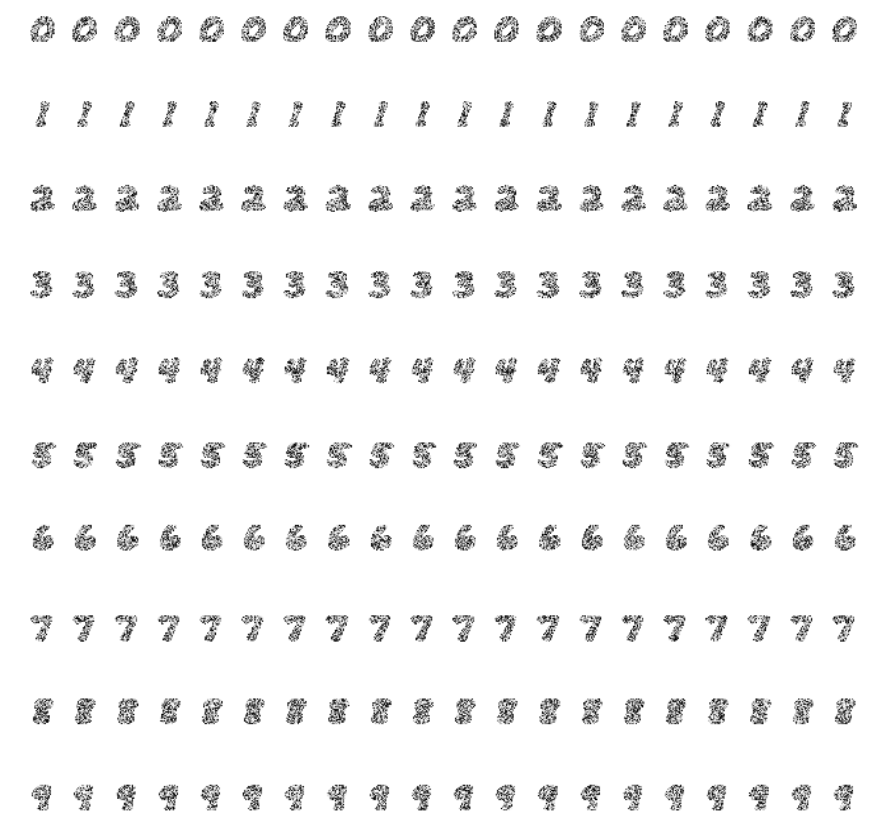

In [19]:
def P10(num_examples):

    ### STUDENT START ###

    mod = BernoulliNB(binarize=0.2)
    mod.fit(train_data, train_labels)

    a = np.exp(mod.feature_log_prob_)
    b = a > .2
    c = b.astype(int)

    f, axs = plt.subplots(10,num_examples,figsize=(15,15))

    for row in range(0,10):
        for col in range(1,num_examples+1):
            # subplot indexing by row & column
            plt.subplot(10,num_examples,num_examples*row+col)
            plt.imshow((c[row]*np.random.rand(784)).reshape(28,28), cmap="Greys")
            plt.axis('off')

    ### STUDENT END ###

P10(20)

ANSWER: The generated digits look much clearer than the training digits. Since each output for the BernoulliNB is 0 or 1, it makes the digits much clearer, with either no pixel or yes pixel, so each digit is much better quality and actually looks like the digits.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [46]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    clf = BernoulliNB(alpha=.0001, fit_prior=False)
    clf.fit(train_data, train_labels)

    for j in range(len(test_data)):
        for i in range(len(buckets)):
            if np.max(clf.predict_proba(test_data[j].reshape(1,-1))) <= buckets[i]:
                total[i] += 1
                if test_labels[j]==(np.where(clf.predict_proba(test_data[j].reshape(1,-1))==np.max(clf.predict_proba(test_data[j].reshape(1,-1))))[1]):
                    correct[i] += 1

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = float(correct[i]) / float(total[i])
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   2    accuracy = 0.000
p(pred) <= 0.9000000000000    total = 273    accuracy = 0.440
p(pred) <= 0.9990000000000    total = 838    accuracy = 0.463
p(pred) <= 0.9999900000000    total = 1390    accuracy = 0.483
p(pred) <= 0.9999999000000    total = 1909    accuracy = 0.525
p(pred) <= 0.9999999990000    total = 2400    accuracy = 0.563
p(pred) <= 0.9999999999900    total = 2902    accuracy = 0.596
p(pred) <= 0.9999999999999    total = 3370    accuracy = 0.626
p(pred) <= 1.0000000000000    total = 9000    accuracy = 0.835


ANSWER: I would classify the BernoulliNB classifier as a weakly calibrated classifier, as there is a correlation between posterior probability and accuracy, but it's not very good. We can see that the accuracy increases as the max posterior increases, but even with a maximum posterior close to 0.9999999999999, the accuracy is 62.6%. It's better than when the max posterior is 0.9 (at 44%) but not that much better. A strongly calibrated classifier would have 90% accuracy with a posterior of 0.9, but ours is at 44% which is not very accurate. However, we can get up to 83.5% accuracy with a posterior that is greater than 0.9999999999999

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [101]:
#def P12():

### STUDENT START ###

# initialize array for sums of rows for every digit
# 28 rows of 28 digits each. so every row of the sums array will be a digit,
# and the nth column is the sum of the nth row of that digit

rowsums = np.zeros(len(train_data)*28).reshape(len(train_data),28)

# now changing sums array to hold the actual sums of each row for every digit
# ie. sum[1] will be a list of 28 numbers, each number is the sum of a row in the 1st digit
# of the training data

for i in range(0, len(train_data)):
    for row in range(0,28):
        rowsums[i][row] = np.sum(train_data[i][range(28*row,28*row+27)])

extra = KNeighborsClassifier(n_neighbors=1)
extra.fit(rowsums, train_labels)

# now find row sums for the dev data to try to predict
dev_rowsums = np.zeros(len(dev_data)*28).reshape(len(dev_data),28)

for i in range(0, len(dev_data)):
    for row in range(0,28):
        dev_rowsums[i][row] = np.sum(dev_data[i][range(28*row,28*row+27)])
        
print extra.score(dev_rowsums, dev_labels)

# only an accuracy of 81.6%.. maybe we should add column sums

colsums = np.zeros(len(train_data)*28).reshape(len(train_data),28)

for i in range(0, len(train_data)):
    for col in range(0,28):
        colsums[i][col] = np.sum(train_data[i][np.arange(col,784,28)])

extra2 = KNeighborsClassifier(n_neighbors=1)
extra2.fit(colsums, train_labels)

dev_colsums = np.zeros(len(dev_data)*28).reshape(len(dev_data),28)

for i in range(0, len(dev_data)):
    for col in range(0,28):
        dev_colsums[i][col] = np.sum(dev_data[i][np.arange(col,784,28)])

print extra2.score(dev_colsums, dev_labels)

# a worse accuracy of 58.6%..


### STUDENT END ###

#P12()

0.816
0.586
